In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import pydicom

pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_excel('./data/PSPF meningioma 20211005.xls', sheet_name='Sheet2')
df = df.drop(columns=df.columns[0])
df = df.drop(columns=[
    'T1+C (srs/img)', 'T1 (srs/img)', 'T2 (srs/img)', 'FLAIR (srs/img)', 
    '1st MRI',	'OP date',	'The Latest MRI ', 'Date of MRI with P/R ',
    '1st MRI.1', #'x', 'y', 'z',
])
df.head()

,Progression/Recurrence (Yes:1 No:0),Gender (M:1 F:0),Age,Special histology (0:meningothelial 1:fibroblastic 2: angiomatous 3:transitional (mixed) 4:psammoma 5: microcystic 6: metaplastic,Simpson grade resection (1-5),ADC tumor,Adjacent bone invasion,GTR,STR,Peritumoral edema (Yes:1 or No:1),Heterogeneous enhancement (Yes:1 or No:0),Calcification,Reactive hyperostosis,Dural tail sign,Cystic change or necrosis,Maximal diameter,Tumor volume (cm3),x,y,z,"Location 1: Skull base(SB), 2: PSPF, 3: Convexity, 4: Others","WHO grade 1.2.3 (benign, atypical, malignant)",> 1y F/U MRI after OP (Y:1 N:0),F/U time (month),R/T before P/R (Y:1 N:0),(1) Discovery 750 (2) Signa HD (3) Avanto (4) Symphony tim (5) Aera (6) Others,PR time (months)
0,1,1,57,0,4,0.74,1,0,1,1,0,0,0,1,0,4.7,10.716,2.4,4.7,1.9,2,1,1,108,0,2.0,8.0
1,1,0,55,0,1,0.82,1,1,0,0,0,0,0,0,0,4.3,21.500,2.5,4.3,4.0,2,1,1,117,0,2.0,53.0
2,1,0,71,0,4,0.72,0,0,1,0,0,0,0,0,0,4.3,21.500,2.5,4.3,4.0,2,1,1,113,0,4.0,92.0
3,0,1,72,0,3,0.88,0,1,0,1,1,1,0,1,0,3.8,19.152,2.8,3.8,3.6,2,1,1,26,0,2.0,26.0
4,0,0,79,0,4,0.80,0,0,1,1,0,0,0,0,0,4.0,25.840,3.4,3.8,4.0,2,1,1,96,1,3.0,96.0


In [3]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
# .fit(df['Simpson grade resection (1-5)'])

dfs = enc.fit_transform(df)
# pd.DataFrame(dfs)
data = pd.get_dummies(df,prefix=['Simpson grade resection'], columns = ['Simpson grade resection (1-5)'])
data.head()

,Progression/Recurrence (Yes:1 No:0),Gender (M:1 F:0),Age,Special histology (0:meningothelial 1:fibroblastic 2: angiomatous 3:transitional (mixed) 4:psammoma 5: microcystic 6: metaplastic,ADC tumor,Adjacent bone invasion,GTR,STR,Peritumoral edema (Yes:1 or No:1),Heterogeneous enhancement (Yes:1 or No:0),Calcification,Reactive hyperostosis,Dural tail sign,Cystic change or necrosis,Maximal diameter,Tumor volume (cm3),x,y,z,"Location 1: Skull base(SB), 2: PSPF, 3: Convexity, 4: Others","WHO grade 1.2.3 (benign, atypical, malignant)",> 1y F/U MRI after OP (Y:1 N:0),F/U time (month),R/T before P/R (Y:1 N:0),(1) Discovery 750 (2) Signa HD (3) Avanto (4) Symphony tim (5) Aera (6) Others,PR time (months),Simpson grade resection_1,Simpson grade resection_2,Simpson grade resection_3,Simpson grade resection_4
0,1,1,57,0,0.74,1,0,1,1,0,0,0,1,0,4.7,10.716,2.4,4.7,1.9,2,1,1,108,0,2.0,8.0,0,0,0,1
1,1,0,55,0,0.82,1,1,0,0,0,0,0,0,0,4.3,21.500,2.5,4.3,4.0,2,1,1,117,0,2.0,53.0,1,0,0,0
2,1,0,71,0,0.72,0,0,1,0,0,0,0,0,0,4.3,21.500,2.5,4.3,4.0,2,1,1,113,0,4.0,92.0,0,0,0,1
3,0,1,72,0,0.88,0,1,0,1,1,1,0,1,0,3.8,19.152,2.8,3.8,3.6,2,1,1,26,0,2.0,26.0,0,0,1,0
4,0,0,79,0,0.80,0,0,1,1,0,0,0,0,0,4.0,25.840,3.4,3.8,4.0,2,1,1,96,1,3.0,96.0,0,0,0,1


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['PR time (months)', 'F/U time (month)']] = scaler.fit_transform(df[['PR time (months)', 'F/U time (month)']])
df.head()

,Progression/Recurrence (Yes:1 No:0),Gender (M:1 F:0),Age,Special histology (0:meningothelial 1:fibroblastic 2: angiomatous 3:transitional (mixed) 4:psammoma 5: microcystic 6: metaplastic,Simpson grade resection (1-5),ADC tumor,Adjacent bone invasion,GTR,STR,Peritumoral edema (Yes:1 or No:1),Heterogeneous enhancement (Yes:1 or No:0),Calcification,Reactive hyperostosis,Dural tail sign,Cystic change or necrosis,Maximal diameter,Tumor volume (cm3),x,y,z,"Location 1: Skull base(SB), 2: PSPF, 3: Convexity, 4: Others","WHO grade 1.2.3 (benign, atypical, malignant)",> 1y F/U MRI after OP (Y:1 N:0),F/U time (month),R/T before P/R (Y:1 N:0),(1) Discovery 750 (2) Signa HD (3) Avanto (4) Symphony tim (5) Aera (6) Others,PR time (months)
0,1,1,57,0,4,0.74,1,0,1,1,0,0,0,1,0,4.7,10.716,2.4,4.7,1.9,2,1,1,0.746032,0,2.0,0.000000
1,1,0,55,0,1,0.82,1,1,0,0,0,0,0,0,0,4.3,21.500,2.5,4.3,4.0,2,1,1,0.817460,0,2.0,0.340909
2,1,0,71,0,4,0.72,0,0,1,0,0,0,0,0,0,4.3,21.500,2.5,4.3,4.0,2,1,1,0.785714,0,4.0,0.636364
3,0,1,72,0,3,0.88,0,1,0,1,1,1,0,1,0,3.8,19.152,2.8,3.8,3.6,2,1,1,0.095238,0,2.0,0.136364
4,0,0,79,0,4,0.80,0,0,1,1,0,0,0,0,0,4.0,25.840,3.4,3.8,4.0,2,1,1,0.650794,1,3.0,0.666667


# Visualization

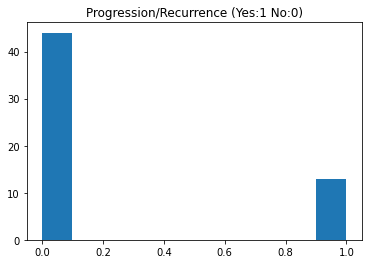

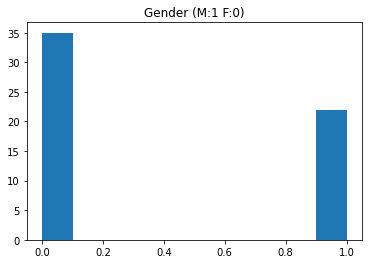

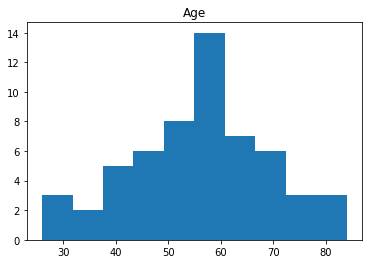

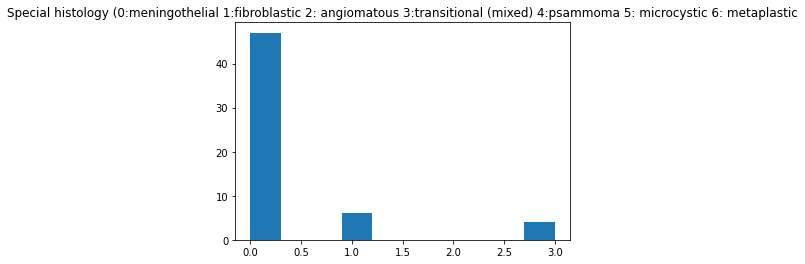

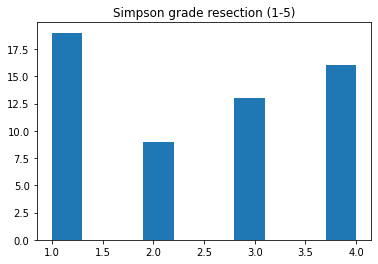

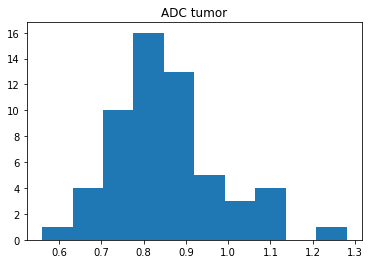

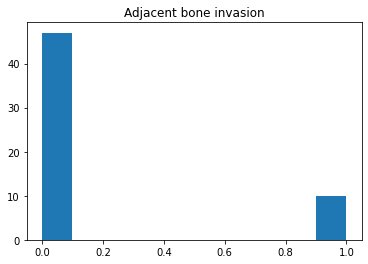

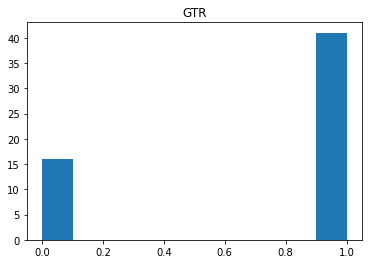

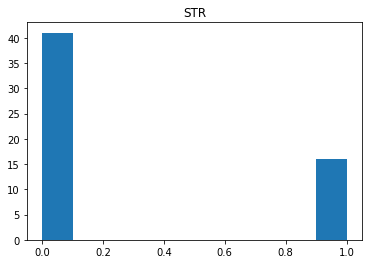

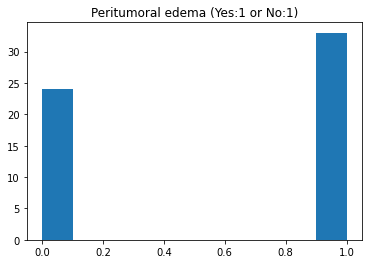

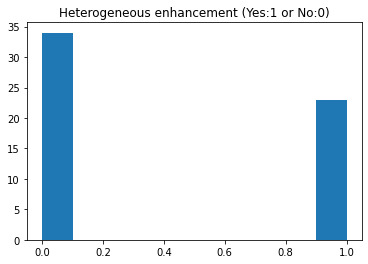

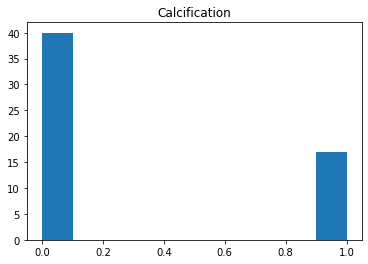

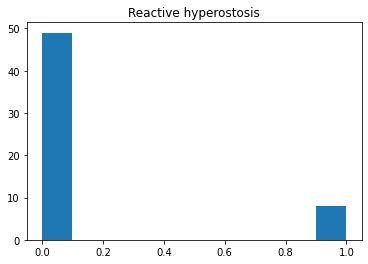

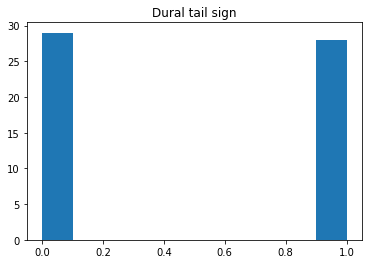

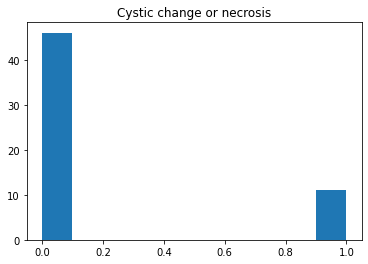

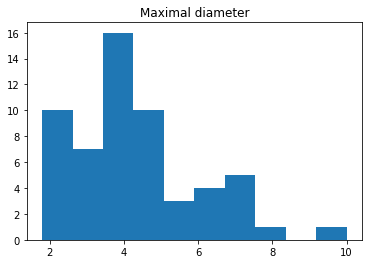

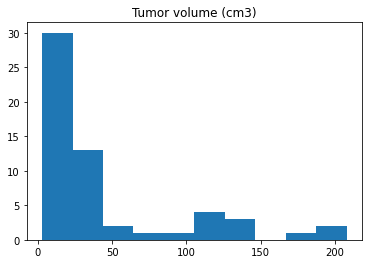

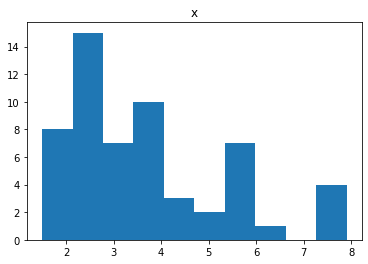

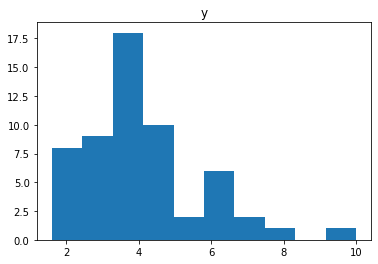

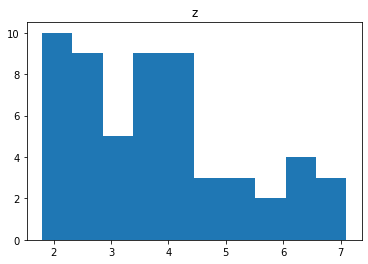

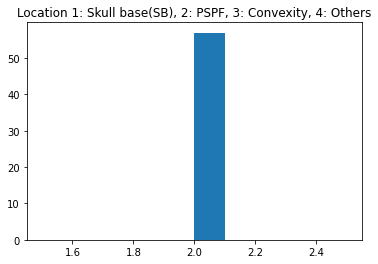

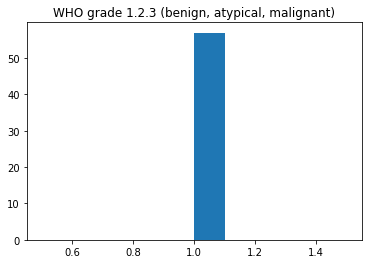

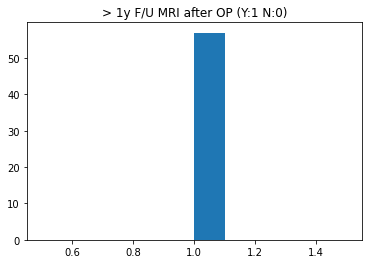

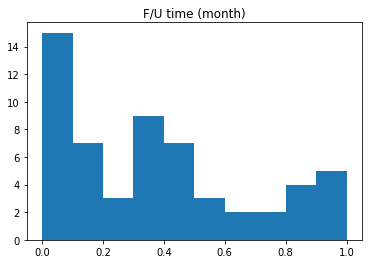

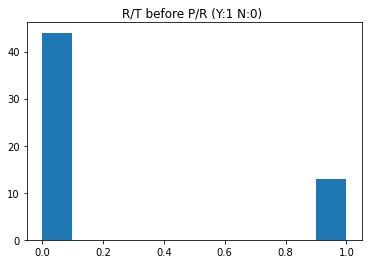

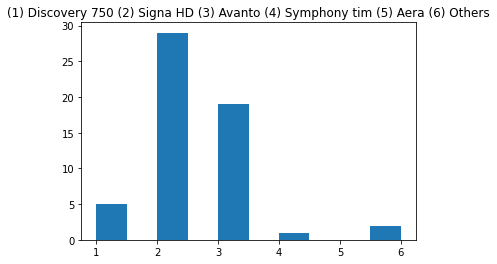

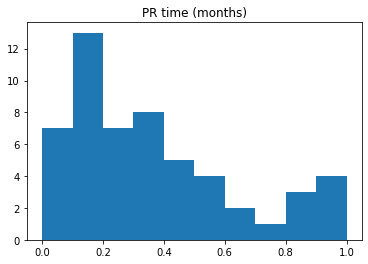

In [5]:
def col_vis(col):
    plt.hist(df[col])
    plt.title(col)
    plt.show()

for col in df.columns: col_vis(col)

In [6]:
df.fillna(df.mean())
df.head()

,Progression/Recurrence (Yes:1 No:0),Gender (M:1 F:0),Age,Special histology (0:meningothelial 1:fibroblastic 2: angiomatous 3:transitional (mixed) 4:psammoma 5: microcystic 6: metaplastic,Simpson grade resection (1-5),ADC tumor,Adjacent bone invasion,GTR,STR,Peritumoral edema (Yes:1 or No:1),Heterogeneous enhancement (Yes:1 or No:0),Calcification,Reactive hyperostosis,Dural tail sign,Cystic change or necrosis,Maximal diameter,Tumor volume (cm3),x,y,z,"Location 1: Skull base(SB), 2: PSPF, 3: Convexity, 4: Others","WHO grade 1.2.3 (benign, atypical, malignant)",> 1y F/U MRI after OP (Y:1 N:0),F/U time (month),R/T before P/R (Y:1 N:0),(1) Discovery 750 (2) Signa HD (3) Avanto (4) Symphony tim (5) Aera (6) Others,PR time (months)
0,1,1,57,0,4,0.74,1,0,1,1,0,0,0,1,0,4.7,10.716,2.4,4.7,1.9,2,1,1,0.746032,0,2.0,0.000000
1,1,0,55,0,1,0.82,1,1,0,0,0,0,0,0,0,4.3,21.500,2.5,4.3,4.0,2,1,1,0.817460,0,2.0,0.340909
2,1,0,71,0,4,0.72,0,0,1,0,0,0,0,0,0,4.3,21.500,2.5,4.3,4.0,2,1,1,0.785714,0,4.0,0.636364
3,0,1,72,0,3,0.88,0,1,0,1,1,1,0,1,0,3.8,19.152,2.8,3.8,3.6,2,1,1,0.095238,0,2.0,0.136364
4,0,0,79,0,4,0.80,0,0,1,1,0,0,0,0,0,4.0,25.840,3.4,3.8,4.0,2,1,1,0.650794,1,3.0,0.666667


In [7]:
ds = pydicom.dcmread("/home/rockyo/Chemei-PR/data/PSPF meningioma 20210904/non PR/31406726/315758070.dcm")
ds
# Series Description

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 188
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.5.799039.6726.1450153750.497
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.410.200010.99.3.5
(0002, 0013) Implementation Version Name         SH: 'INF_3.8'
(0002, 0016) Source Application Entity Title     AE: 'QCX'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 936
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'ADC', 'ADC']
(0008, 0012) Instance Creation Date              DA: '20151215'
(0008, 0013) Instance Creation Time              TM: '12

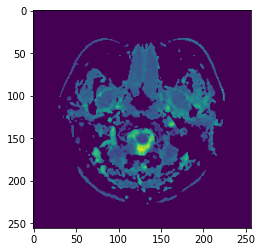

In [8]:
plt.imshow(ds.pixel_array)

In [9]:
import os 

s = set()
non_pr = './data/PSPF meningioma 20210904/non PR'
for patient in os.listdir(non_pr):
    patient_dir = os.path.join(non_pr, patient)
    for dcm_file in os.listdir(patient_dir):
        fpath = os.path.join(patient_dir, dcm_file)
        ds = pydicom.dcmread(fpath)
        s.add(ds.SeriesDescription)
    #     break
    # break
print(s)


{'Mag_Images', 'MIP', 't2_gre(fl2d)_tra', ' MRV S-I', 'MRA(3D TOF)', 'AX  T1 FLAIR+c (G)', 'Axl T2 FRFSE', 'AX FSE T2', 'COL:Axl 3DTOF 3SLAB', 'PC MRV R-L', 'TOF_3D_MRA', 'Axl GRE', 'S-I MRV', 'Sag T1 FLAIR FS+C', 'Cor T1 FSE fs +C', 'T1_tirm_sag', 'MRA', 'L-R MRA', 'Ax T1 SE+C', 'Axl T2 FLAIR', 'Ax FSPGR BRAVO', 'Pha_Images', 'Ax T2W frFSE', 'AxT1 Flair FS+c', 'DDWI', 'Cor T2 FRFSE', 'S-I MRA', '3DTOF MRA', 'Ax T1 SE +C', 't2_blade_cor', 'SUB:TRICKS ASSET', 'MRV', 'T2_tse_cor', 'Axl DWIb1500', 'Exponential Apparent Diffusio', 'Apparent Diffusion Coefficient (mm2/s)', 'SagT1 Flair FS+c', '3DTOF 1 slab', 'ep2d_diff_p2_ADC', 'si mrv', 'ep2d_diff_3scan_trace_p2', 'ep2d_diff_p2', 'Sag T1 Flair', 'R-L MRv', 'Ax T1 Flair', 'PJN', 'Sag T1 Flair+C', 'BRAIN      T1W-AXL', 'fl_pc MRV(v20)_MSUM_MIP_SAG', "L'T ICA", 't2_blade_tra_FLAIR', 'COL:3DTOF 3SLAB(Shim)', 'COR FSE T2', 'Ax T1 SE', 'Cor T1 FLAIR FS+C', 'TOF MRv R-L', 'Diffusion', 'AX  T1 FLAIR', 'Ax DWI', 'COR FSPGR (1.2) +C', 'AX T2FLAIR', 

In [10]:
ds.SeriesDescription

'AxT2* GRE'

In [11]:
ds.SeriesDescription

'AxT2* GRE'

In [12]:
s

{' MRA',
 ' MRV S-I',
 '2DTOF MRV',
 '3 PLANE',
 '3-pl T2* FGRE',
 '3DTOF 1 slab',
 '3DTOF 3SLAB(Shim)',
 '3DTOF MRA',
 '3DTOF MRA(with SAT)',
 'AX  T1 FLAIR',
 'AX  T1 FLAIR+c (G)',
 'AX 3D  TOF',
 'AX DIFF(B=1000)',
 'AX FLAIR',
 'AX FSE T2',
 'AX GRET2',
 'AX T2FLAIR',
 'AXL GRE',
 'AXT1FLAIR',
 'AXT1FLAIRfs+c',
 'AXT2',
 'Apparent Diffusion Coefficien',
 'Apparent Diffusion Coefficient (mm2/s)',
 'Apparent Diffusion Coefficient (mm?/s)',
 'Apparent Diffusion Coefficient (mm²/s)',
 'Ax DWI',
 'Ax DWI 1000b',
 'Ax DWI b=1000',
 'Ax FRFSE T2',
 'Ax FSPGR BRAVO',
 'Ax GRE T2*',
 'Ax PROBE-SV PRESS 144TE',
 'Ax STIR',
 'Ax T1 FLAIR',
 'Ax T1 FSE fs+ C',
 'Ax T1 Flair',
 'Ax T1 Flair+C',
 'Ax T1 SE',
 'Ax T1 SE +C',
 'Ax T1 SE+C',
 'Ax T2 FLAIR',
 'Ax T2* GRE',
 'Ax T2W frFSE',
 'AxDWI b=1000',
 'AxT1 Flair',
 'AxT1 Flair FS+c',
 'AxT2 Flair',
 'AxT2 Flair 2acq',
 'AxT2 frFSE',
 'AxT2* GRE',
 'Axl DWIb1500',
 'Axl GRE',
 'Axl T1 FLAIR',
 'Axl T1 FLAIR FS+C',
 'Axl T2 FLAIR',
 'Axl T2 FRF